In [45]:
import sys  

from utils import *
import os
import importlib
import numpy as np
from scipy.io import wavfile
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 120
#%matplotlib widget  # don't use widgets for figures to be commited
from IPython.display import Audio
import librosa
import soundfile

import divadataset
import diva
import lib
import utils.figures
import socket
import time
from datetime import datetime 

In [11]:
importlib.reload(diva)



<module 'diva' from '/home/irisib/Bureau/nn-synth-interp/synth/diva.py'>

In [21]:
print("Machine: '{}' ({} CPUs)".format(socket.gethostname(), os.cpu_count()))


t0 = time.time()
diva_db = diva.PresetDatabase()
diva_synth = diva.Diva()
diva_db.get_size_info()
print("{} (loaded in {:.1f}s)".format(diva_db, time.time() - t0))
names = diva_db.get_param_names()


Machine: 'jupyter-server' (4 CPUs)
All params memory usage  : 0.00251007080078125 MB
All presets memory usage : 0.08592987060546875 MB
11217 Diva presets in database '/home/irisib/Bureau/nn-synth-interp/synth/diva_presets.pkl'. (loaded in 0.5s)


In [26]:
param_names = diva.PresetDatabase.get_param_names(diva_db)
print("==============PARAM NAMES==============")
print(diva_synth.engine.get_plugin_parameters_description())

==============PARAM NAMES==============
  0: main: Output
  1: main: Active #FX1
  2: main: Active #FX2
  3: PCore: LED Colour
  4: VCC: Voices
  5: VCC: Voice Stack
  6: VCC: Mode
  7: VCC: GlideMode
  8: VCC: Glide
  9: VCC: Glide2
 10: VCC: GlideRange
 11: VCC: PitchBend Up
 12: VCC: PitchBend Down
 13: VCC: TuningMode
 14: VCC: Transpose
 15: VCC: FineTuneCents
 16: VCC: Note Priority
 17: VCC: MultiCore
 18: OPT: Accuracy
 19: OPT: OfflineAcc
 20: OPT: TuneSlop
 21: OPT: CutoffSlop
 22: OPT: GlideSlop
 23: OPT: PWSlop
 24: OPT: EnvrateSlop
 25: OPT: V1Mod
 26: OPT: V2Mod
 27: OPT: V3Mod
 28: OPT: V4Mod
 29: OPT: V5Mod
 30: OPT: V6Mod
 31: OPT: V7Mod
 32: OPT: V8Mod
 33: ENV1: Attack
 34: ENV1: Decay
 35: ENV1: Sustain
 36: ENV1: Release
 37: ENV1: Velocity
 38: ENV1: Model
 39: ENV1: Trigger
 40: ENV1: Quantise
 41: ENV1: Curve
 42: ENV1: Release On
 43: ENV1: KeyFollow
 44: ENV2: Attack
 45: ENV2: Decay
 46: ENV2: Sustain
 47: ENV2: Release
 48: ENV2: Velocity
 49: ENV2: Model
 5

In [24]:
print("==============NUM OF PRESETS==============")
print(diva_db.get_nb_presets())

==============NUM OF PRESETS==============
11217


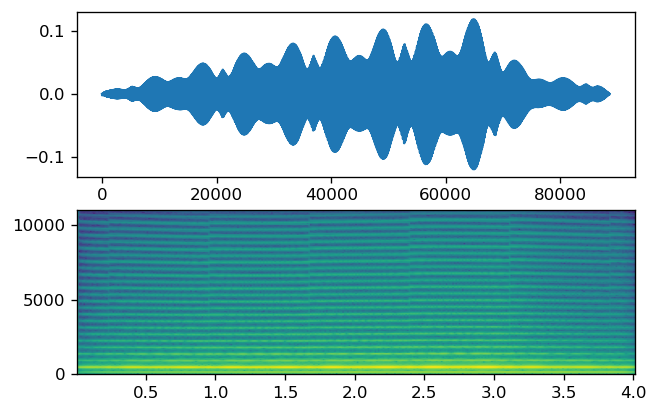

In [33]:
patchTest = diva_db.get_preset_values(555)
diva_synth.assign_preset(patchTest)
audio = diva_synth.render_note(57, 100)

plt.figure(1)
plt.subplot(211)
plt.plot(audio)
plt.subplot(212)
plt.specgram(audio, NFFT=diva_synth.fft_size, Fs=diva_synth.Fs, noverlap=256)
plt.show()

In [49]:
%%time
diva_dataset = divadataset.DivaDataset(note_duration = 3.0, n_fft = 512, fft_hop = 512,
                               midi_note=60, midi_velocity=100, n_mel_bins=-1,
                               normalize_audio=False, spectrogram_min_dB=-120.0,
                               spectrogram_normalization ='min_max')

diva_dataset.generate_wav_files()

Writing .wav files... (0/11216)
Writing .wav files... (50/11216)
Writing .wav files... (100/11216)
Writing .wav files... (150/11216)
Writing .wav files... (200/11216)
Writing .wav files... (250/11216)
Writing .wav files... (300/11216)
Writing .wav files... (350/11216)
Writing .wav files... (400/11216)
Writing .wav files... (450/11216)
Writing .wav files... (500/11216)
Writing .wav files... (550/11216)
Writing .wav files... (600/11216)
Writing .wav files... (650/11216)
Writing .wav files... (700/11216)
Writing .wav files... (750/11216)
Writing .wav files... (800/11216)
Writing .wav files... (850/11216)
Writing .wav files... (900/11216)
Writing .wav files... (950/11216)
Writing .wav files... (1000/11216)
Writing .wav files... (1050/11216)
Writing .wav files... (1100/11216)
Writing .wav files... (1150/11216)
Writing .wav files... (1200/11216)
Writing .wav files... (1250/11216)
Writing .wav files... (1300/11216)
Writing .wav files... (1350/11216)
Writing .wav files... (1400/11216)
Writing 

In [50]:
%%time
diva_dataset.compute_and_store_spectrograms_stats()

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000001_midi060vel100.wav
Processed stats of 0/11216 spectrograms
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000002_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000003_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000004_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000005_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000006_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000007_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000008_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000009_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000010_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synt

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000149_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000150_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000151_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000152_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000153_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000154_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000155_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000156_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000157_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000158_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000159_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000312_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000313_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000314_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000315_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000316_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000317_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000318_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000319_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000320_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000321_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000322_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000478_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000479_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000480_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000481_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000482_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000483_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000484_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000485_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000486_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000487_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000488_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000600_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000601_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000602_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000603_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000604_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000605_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000606_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000607_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000608_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000609_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000610_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000750_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000751_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000752_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000753_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000754_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000755_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000756_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000757_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000758_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000759_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000760_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000946_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000947_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000948_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000949_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000950_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000951_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000952_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000953_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000954_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000955_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset000956_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001074_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001075_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001076_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001077_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001078_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001079_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001080_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001081_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001082_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001083_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001084_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001200_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001201_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001202_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001203_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001204_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001205_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001206_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001207_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001208_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001209_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001210_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001331_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001332_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001333_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001334_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001335_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001336_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001337_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001338_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001339_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001340_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001341_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001521_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001522_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001523_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001524_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001525_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001526_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001527_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001528_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001529_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001530_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001531_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001630_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001631_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001632_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001633_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001634_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001635_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001636_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001637_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001638_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001639_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001640_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001835_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001836_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001837_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001838_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001839_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001840_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001841_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001842_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001843_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001844_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001845_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001947_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001948_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001949_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001950_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001951_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001952_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001953_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001954_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001955_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001956_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset001957_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002087_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002088_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002089_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002090_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002091_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002092_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002093_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002094_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002095_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002096_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002097_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002201_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002202_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002203_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002204_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002205_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002206_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002207_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002208_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002209_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002210_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002211_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002362_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002363_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002364_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002365_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002366_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002367_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002368_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002369_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002370_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002371_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002372_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002488_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002489_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002490_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002491_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002492_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002493_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002494_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002495_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002496_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002497_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002498_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002625_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002626_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002627_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002628_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002629_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002630_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002631_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002632_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002633_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002634_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002635_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002744_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002745_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002746_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002747_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002748_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002749_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002750_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002751_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002752_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002753_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002754_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002902_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002903_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002904_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002905_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002906_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002907_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002908_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002909_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002910_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002911_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset002912_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003028_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003029_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003030_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003031_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003032_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003033_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003034_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003035_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003036_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003037_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003038_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003144_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003145_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003146_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003147_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003148_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003149_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003150_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003151_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003152_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003153_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003154_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003280_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003281_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003282_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003283_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003284_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003285_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003286_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003287_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003288_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003289_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003290_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003433_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003434_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003435_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003436_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003437_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003438_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003439_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003440_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003441_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003442_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003443_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003602_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003603_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003604_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003605_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003606_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003607_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003608_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003609_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003610_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003611_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003612_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003762_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003763_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003764_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003765_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003766_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003767_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003768_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003769_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003770_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003771_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003772_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003871_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003872_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003873_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003874_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003875_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003876_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003877_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003878_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003879_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003880_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset003881_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004019_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004020_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004021_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004022_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004023_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004024_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004025_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004026_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004027_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004028_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004029_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004132_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004133_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004134_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004135_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004136_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004137_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004138_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004139_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004140_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004141_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004142_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004263_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004264_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004265_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004266_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004267_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004268_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004269_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004270_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004271_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004272_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004273_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004413_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004414_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004415_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004416_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004417_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004418_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004419_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004420_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004421_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004422_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004423_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004568_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004569_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004570_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004571_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004572_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004573_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004574_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004575_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004576_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004577_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004578_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004699_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004700_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004701_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004702_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004703_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004704_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004705_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004706_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004707_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004708_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004709_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004839_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004840_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004841_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004842_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004843_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004844_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004845_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004846_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004847_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004848_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004849_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004976_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004977_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004978_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004979_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004980_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004981_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004982_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004983_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004984_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004985_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset004986_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005128_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005129_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005130_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005131_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005132_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005133_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005134_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005135_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005136_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005137_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005138_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005286_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005287_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005288_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005289_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005290_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005291_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005292_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005293_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005294_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005295_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005296_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005444_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005445_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005446_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005447_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005448_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005449_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005450_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005451_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005452_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005453_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005454_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005612_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005613_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005614_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005615_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005616_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005617_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005618_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005619_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005620_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005621_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005622_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005780_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005781_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005782_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005783_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005784_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005785_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005786_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005787_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005788_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005789_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005790_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005937_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005938_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005939_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005940_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005941_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005942_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005943_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005944_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005945_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005946_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset005947_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006099_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006100_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006101_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006102_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006103_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006104_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006105_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006106_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006107_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006108_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006109_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006262_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006263_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006264_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006265_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006266_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006267_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006268_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006269_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006270_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006271_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006272_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006431_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006432_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006433_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006434_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006435_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006436_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006437_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006438_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006439_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006440_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006441_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006599_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006600_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006601_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006602_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006603_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006604_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006605_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006606_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006607_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006608_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006609_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006770_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006771_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006772_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006773_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006774_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006775_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006776_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006777_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006778_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006779_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006780_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006939_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006940_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006941_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006942_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006943_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006944_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006945_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006946_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006947_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006948_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset006949_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007105_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007106_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007107_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007108_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007109_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007110_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007111_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007112_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007113_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007114_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007115_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007277_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007278_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007279_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007280_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007281_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007282_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007283_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007284_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007285_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007286_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007287_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007439_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007440_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007441_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007442_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007443_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007444_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007445_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007446_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007447_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007448_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007449_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007609_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007610_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007611_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007612_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007613_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007614_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007615_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007616_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007617_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007618_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007619_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007746_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007747_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007748_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007749_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007750_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007751_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007752_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007753_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007754_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007755_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007756_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007911_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007912_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007913_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007914_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007915_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007916_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007917_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007918_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007919_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007920_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset007921_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008072_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008073_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008074_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008075_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008076_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008077_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008078_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008079_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008080_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008081_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008082_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008225_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008226_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008227_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008228_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008229_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008230_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008231_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008232_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008233_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008234_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008235_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008379_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008380_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008381_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008382_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008383_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008384_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008385_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008386_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008387_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008388_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008389_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008525_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008526_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008527_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008528_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008529_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008530_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008531_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008532_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008533_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008534_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008535_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008676_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008677_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008678_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008679_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008680_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008681_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008682_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008683_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008684_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008685_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008686_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008825_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008826_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008827_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008828_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008829_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008830_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008831_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008832_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008833_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008834_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008835_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008965_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008966_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008967_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008968_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008969_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008970_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008971_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008972_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008973_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008974_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset008975_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009116_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009117_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009118_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009119_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009120_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009121_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009122_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009123_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009124_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009125_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009126_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009278_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009279_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009280_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009281_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009282_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009283_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009284_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009285_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009286_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009287_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009288_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009413_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009414_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009415_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009416_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009417_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009418_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009419_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009420_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009421_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009422_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009423_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009547_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009548_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009549_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009550_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009551_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009552_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009553_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009554_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009555_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009556_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009557_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009691_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009692_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009693_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009694_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009695_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009696_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009697_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009698_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009699_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009700_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009701_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009834_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009835_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009836_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009837_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009838_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009839_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009840_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009841_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009842_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009843_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009844_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009996_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009997_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009998_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset009999_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010000_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010001_midi060vel100.wav
Processed stats of 10000/11216 spectrograms
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010002_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010003_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010004_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010005_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010159_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010160_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010161_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010162_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010163_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010164_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010165_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010166_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010167_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010168_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010169_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010316_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010317_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010318_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010319_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010320_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010321_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010322_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010323_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010324_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010325_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010326_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010477_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010478_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010479_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010480_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010481_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010482_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010483_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010484_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010485_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010486_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010487_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010654_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010655_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010656_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010657_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010658_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010659_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010660_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010661_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010662_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010663_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010664_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010824_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010825_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010826_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010827_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010828_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010829_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010830_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010831_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010832_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010833_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010834_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010987_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010988_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010989_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010990_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010991_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010992_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010993_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010994_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010995_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010996_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset010997_midi06

/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset011153_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset011154_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset011155_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset011156_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset011157_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset011158_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset011159_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset011160_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset011161_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset011162_midi060vel100.wav
/home/irisib/Bureau/nn-synth-interp/synth/diva_presets/Rendu/preset011163_midi06

In [51]:

#diva_db = diva.PresetDatabase()
#diva_synth = diva.Diva()
#diva_dataset
# Visu du dataframe de départ
presets_df = diva_db.all_presets

def get_preset_UID(preset_index):
    return presets_df.iloc[preset_index]['index_preset']

presets_df

[[(0, 0.45),
  (1, 0.0),
  (2, 0.0),
  (3, 0.0),
  (4, 0.42857142857142855),
  (5, 0.0),
  (6, 0.0),
  (7, 0.0),
  (8, 0.0),
  (9, 0.5),
  (10, 1.0),
  (11, 0.07692307692307693),
  (12, 0.07692307692307693),
  (13, 0),
  (14, 0.5),
  (15, 0.5),
  (16, 0.0),
  (17, 0),
  (18, 0),
  (19, 0),
  (20, 0.1),
  (21, 0.1),
  (22, 0.1),
  (23, 0.01),
  (24, 0.1),
  (25, 0.5),
  (26, 0.5),
  (27, 0.5),
  (28, 0.5),
  (29, 0.5),
  (30, 0.5),
  (31, 0.5),
  (32, 0.5),
  (33, 0.21),
  (34, 0.21),
  (35, 1.0),
  (36, 0.12),
  (37, 0.0),
  (38, 0.5),
  (39, 0),
  (40, 0.0),
  (41, 0.0),
  (42, 0.0),
  (43, 0.0),
  (44, 0.0),
  (45, 0.19),
  (46, 1.0),
  (47, 0.57),
  (48, 0.0),
  (49, 0.5),
  (50, 0),
  (51, 0.0),
  (52, 0.0),
  (53, 0.0),
  (54, 0.0),
  (55, 0.0),
  (56, 0.3333333333333333),
  (57, 0.0),
  (58, 0.0),
  (59, 0.505),
  (60, 0.0),
  (61, 1.0),
  (62, 0.5),
  (63, 0.0),
  (64, 0.5),
  (65, 0.19230769230769232),
  (66, 0.3333333333333333),
  (67, 0.0),
  (68, 0.0),
  (69, 1.0),
  (70, 0.